### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Set Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0" --epochs 10 --arch efficientnet_b0 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100% 20.5M/20.5M [00:00<00:00, 141MB/s] 
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0870 acc 0.7714 | val loss 0.0387 acc 0.9198 roc_auc 0.9848 pr_auc 0.9910
Epoch 2: train loss 0.0552 acc 0.8807 | val loss 0.0324 acc 0.9401 roc_auc 0.9883 pr_auc 0.9931
Epoch 3: train loss 0.0493 acc 0.9018 | val loss 0.0300 acc 0.9356 roc_auc 0.9890 pr_auc 0.9953
Epoch 4: train loss 0.0368 acc 0.9267 | val loss 0.0281 acc 0.9650 roc_auc 0.9893 pr_auc 0.9951
Epoch 5: train loss 0.0368 acc 0.9336 | val loss 0.0256 acc 0.9650 roc_auc 0.9922 pr_auc 0.9966
Epoch 6: train loss 0.0299 acc 0.9429 | val loss 0.0260 acc 0.9672 roc_auc 0.9908 pr_auc 0.9959
Epoch 7: train loss

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/best_efficientnet_b0.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.95      0.97      0.96       237
   PNEUMONIA       0.99      0.98      0.99       669

    accuracy                           0.98       906
   macro avg       0.97      0.97      0.97       906
weighted avg       0.98      0.98      0.98       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9971
  PR-AUC: 0.9989
  Specificity>=0.90: thr=0.137 sens=0.996 spec=0.903 prec=0.967
  Best F1: thr=0.249 sens=0.994 spec=0.941 prec=0.979 f1=0.987
Confusion matrix:
[[229   8]
 [ 11 658]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria


In [ ]:
from IPython.display import Image

In [ ]:
pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/best_efficientnet_b0.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_1.png" --arch "efficientnet_b0"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_1.png. Pred class id: 1


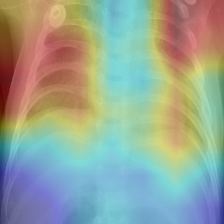

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:
pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/best_efficientnet_b0.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_2.png" --arch "efficientnet_b0"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_2.png. Pred class id: 1


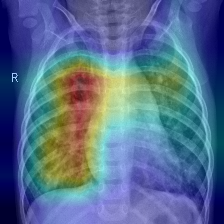

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_2.png')

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/best_efficientnet_b0.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_noraml_1.png" --arch "efficientnet_b0"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_noraml_1.png. Pred class id: 0


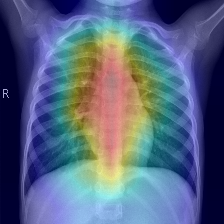

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_noraml_1.png')

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/best_efficientnet_b0.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="efficientnet_b0", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 4,730,366
